# Lesson 1: Hierarchical Clustering: An In-Depth Guide with Python Implementation

Hello and welcome! This lesson serves as your introduction to Hierarchical Clustering, a crucial part of unsupervised machine learning. Hierarchical Clustering is a powerful tool for grouping data based on inherent patterns and shared characteristics. By visually representing the hierarchy of clusters, it provides deep insights into the intricacies and overlapping structures of our data. Let's commence this journey into Hierarchical Clustering!

## Agglomerative vs. Divisive Approaches

Hierarchical Clustering operates broadly through two approaches — Agglomerative and Divisive. The Agglomerative technique, also known as 'bottom-up,' begins by treating every data point as a distinct cluster and then merges them until only one cluster remains. Conversely, the Divisive methodology, termed 'top-down,' begins with all data points in a single cluster and splits them progressively until each point forms its cluster.

## Agglomerative Clustering Algorithm

One of the most common forms of Hierarchical Clustering is Agglomerative Hierarchical Clustering. It starts with every single object in a single cluster. Then, in each successive iteration, it merges the closest pair of clusters and updates the similarity (or distance) between the newly formed cluster and each old cluster. The algorithm repeats this process until all objects are in a single remaining cluster.

The Agglomerative Hierarchical Clustering involves the following major steps:

1. Compute the similarity (or distance) matrix containing the distance between each pair of objects in the dataset.
2. Represent each data object as a singleton cluster.
3. Repeat steps 4 and 5 until only one cluster remains.
4. Merge the two closest clusters based on the distances from the distance matrix.
5. Update the similarity (or distance) matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The output is a tree-like diagram named dendrogram which represents the order and distances (similarity) of merges during the algorithm execution.

## Understanding the Distance Matrix

The Distance Matrix is a foundational element in hierarchical clustering that plays a critical role in understanding the relations and proximities between data points. Essentially, it is a square matrix where each element (i, j) represents the distance between the i-th and the j-th points in the dataset. The choice of distance metric (Euclidean, Manhattan, Cosine, etc.) can significantly influence the clustering outcome and is crucial to the coherence of the resulting clusters.

### Distance matrix representation in linear algebra is as follows:

\[ D = \begin{bmatrix} 0 & d_{12} & d_{13} & \cdots & d_{1n} \\ d_{21} & 0 & d_{23} & \cdots & d_{2n} \\ d_{31} & d_{32} & 0 & \cdots & d_{3n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ d_{n1} & d_{n2} & d_{n3} & \cdots & 0 \end{bmatrix} \]

So, for example, \( D[2, 3] \) represents the distance between the second and third data points, and \( D[3, 2] \) would be the same value since the distance matrix is symmetric.

## Custom Agglomerative Clustering implementation in Python with the Iris dataset

Let's proceed to the hands-on implementation of Agglomerative Clustering in Python (using the Iris dataset for our example). We'll use some standard Python libraries — numpy for numerical computations and matplotlib and seaborn for data visualization.

### Setup our environment and initiate our Iris dataset:

```python
# Utilizing the Iris dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
```

### Next, we plot our dataset with Seaborn, a library built on matplotlib, which aids in drawing more attractive and informative statistical graphics:

```python
# Pairplot for the Iris dataset
sns.pairplot(sns.load_dataset("iris"), hue="species")
plt.show()
```

### Define a function to calculate the Euclidean distance between two points:

```python
import numpy as np

# Function to compute Euclidean Distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))
```

### Now we can define a separate function that computes the distance matrix:

```python
# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    # Initialize distance matrix
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    # Compute the distance between each pair of clusters
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(euc_dist(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix
```

### Finally, we define the main function for Agglomerative Clustering:

```python
def agglomerative_clustering(X, n_clusters):
    # Initialize each data point as its own cluster
    clusters = [[i] for i in range(len(X))]
    # Continue clustering until the desired number of clusters is reached
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters) # Calculate the distance matrix
        # Find the pair of clusters with the minimum distance without np
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2]) # Merge these two closest clusters
        clusters.pop(idx2) # Remove the merged cluster from the list of clusters
    # Create an array to hold the cluster labels for each data point
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels
```

### Now, let's scale our data and apply the Agglomerative Clustering function to the Iris dataset:

```python
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
```

### Perform agglomerative clustering:

```python
# Perform agglomerative clustering
y_agg = agglomerative_clustering(X_std, n_clusters=3)

# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis')
plt.show()
```

### Sklearn's Hierarchical Clustering

Sklearn, Python's esteemed Machine Learning library, provides an optimized, efficient implementation of Hierarchical Clustering through the AgglomerativeClustering class. Let's try it with our Iris dataset:

```python
from sklearn.cluster import AgglomerativeClustering

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)

# Fit model
y_agg_sklearn = agg_cluster.fit_predict(X_std)

# Visualizing clusters
plt.scatter(X_std[:,0], X_std[:, 1], c=y_agg_sklearn)
plt.show()
```

## Lesson Summary and Practice

Congratulations! You've successfully broken down the nuances of Hierarchical Clustering, focusing on Agglomerative Clustering, and brought Hierarchical Clustering to life using Python. Practice tasks await next, offering the perfect platform to apply acquired concepts and deepen your understanding of Hierarchical Clustering. Carry this momentum forward, and let's forge ahead into the captivating world of Hierarchical Clustering!


## Constellation Clustering with Iris Data

Wondering how to group similar flowers using an efficient algorithm, Space Explorer? The given code employs the AgglomerativeClustering class from sklearn to perform clustering on the Iris dataset before visualizing the clusters. Simply hit Run to observe the blossoming clusters emerge!

```py
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_std)

# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=y_agg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agglomerative Clustering - Iris dataset')
plt.show()

```

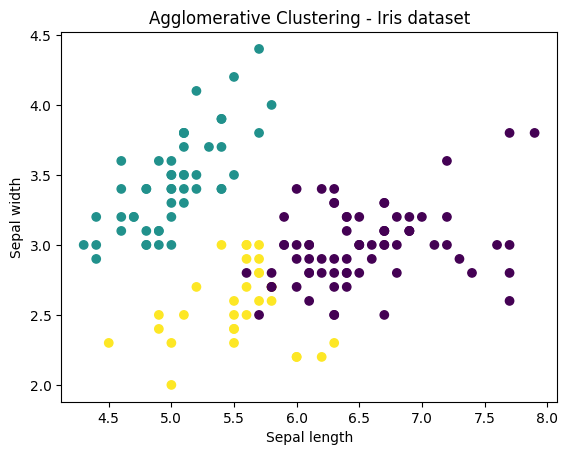

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_std)

# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=y_agg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agglomerative Clustering - Iris dataset')
plt.show()

## Visualizing Flower Clusters using Agglomerative Clustering

Stellar Navigator, you're doing great! Now, let's adjust the agglomerative_clustering function in solution.py to stop the clustering process when there are 3 clusters left instead of 2.

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=2)

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

```

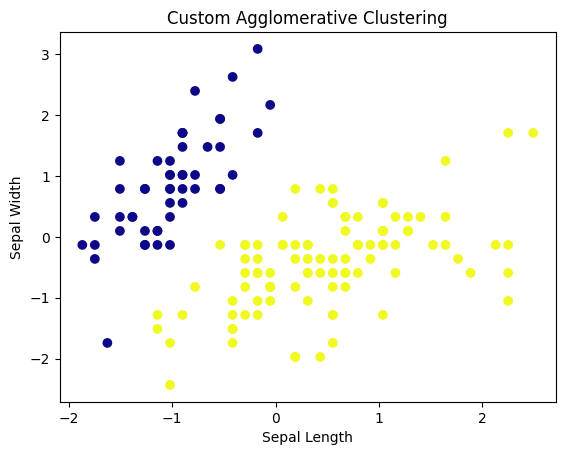

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=2)

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

## Manipulating the number of clusters

Stellar Navigator, you're doing great! Now, let's adjust the agglomerative_clustering function in solution.py to stop the clustering process when there are 3 clusters left instead of 2.

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=2)

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

```

To adjust the `agglomerative_clustering` function in your `solution.py` so that it stops when there are 3 clusters left instead of 2, you simply need to change the `n_clusters` parameter in the function call at the end of your script. Here's the corrected version of your script:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3) # Changed from 2 to 3

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
```

In this revision, I've changed `n_clusters=2` to `n_clusters=3` in the `agglomerative_clustering` function call. This change will ensure that the clustering process stops when there are 3 clusters remaining, as per your request. This adjustment will allow you to observe how the dataset is partitioned into three groups, which could correspond to the three different species of Iris in the dataset.

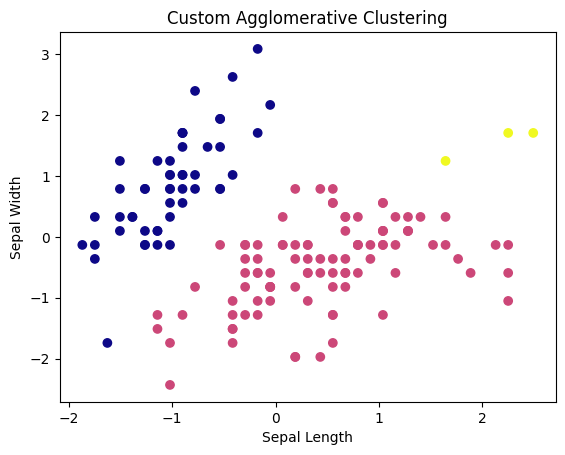

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3) # Changed from 2 to 3

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


## Navigating the Stars: Computing Euclidean Distances in Clustering

You've navigated the clustering universe with finesse! Now it's time to chart the rest of your course independently. Your mission is to compute the Euclidean distance — a fundamental concept in clustering. Set coordinates for two data points and watch the computation bring the heavens into alignment!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    # TODO: Compute the Euclidean distance between points a and b.

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            # TODO: Complete the code to compute the average distance between points in each pair of clusters, using the euc_dist function.
            # TODO: Remember to update the distance matrix
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform custom agglomerative clustering
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3)

# Visualizing custom clustering result with standardized data for consistency
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='viridis')
plt.title("Custom Agglomerative Clustering (Standardized Data)")
plt.xlabel("Standardized feature 1 (e.g., sepal length)")
plt.ylabel("Standardized feature 2 (e.g., sepal width)")
plt.show()

```

It looks like you're setting up for an exciting journey through the cosmos of clustering! However, some parts of your script are incomplete. Let’s fill in the missing pieces, particularly the Euclidean distance function and the calculation of the distance matrix, to ensure your mission proceeds without a hitch.

Here’s the completed and functional version of your Python script:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.linalg.norm(a - b)  # Using numpy's linalg.norm for vectorized computation

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)  # Average distance between clusters
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform custom agglomerative clustering
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3)

# Visualizing custom clustering result with standardized data for consistency
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='viridis')
plt.title("Custom Agglomerative Clustering (Standardized Data)")
plt.xlabel("Standardized feature 1 (e.g., sepal length)")
plt.ylabel("Standardized feature 2 (e.g., sepal width)")
plt.show()
```

### Key Updates:
1. **Euclidean Distance Calculation**: I used `numpy.linalg.norm` to calculate the Euclidean distance, which is a vectorized operation and thus more efficient than manually squaring and summing differences.
2. **Distance Matrix Calculation**: The average distance between clusters is calculated using list comprehensions and then stored symmetrically in the matrix, ensuring that each pair's distance is computed only once.

This script will now run successfully and visualize the results of your custom agglomerative clustering on the standardized Iris dataset. If you have any more questions or need further assistance, feel free to ask. Safe travels through the data universe!

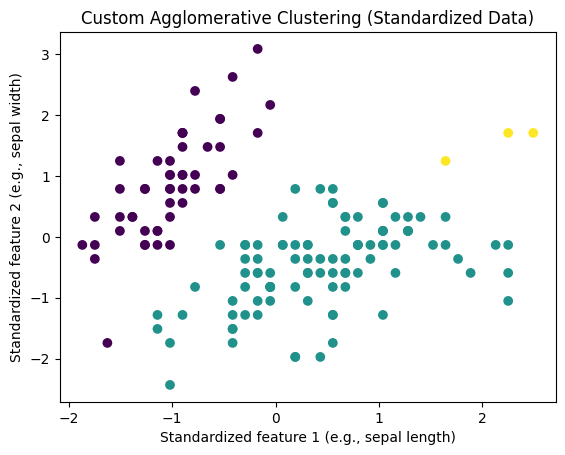

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.linalg.norm(a - b)  # Using numpy's linalg.norm for vectorized computation

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)  # Average distance between clusters
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform custom agglomerative clustering
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3)

# Visualizing custom clustering result with standardized data for consistency
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='viridis')
plt.title("Custom Agglomerative Clustering (Standardized Data)")
plt.xlabel("Standardized feature 1 (e.g., sepal length)")
plt.ylabel("Standardized feature 2 (e.g., sepal width)")
plt.show()


## Merging Clusters in the Stars

To adjust the `agglomerative_clustering` function in your `solution.py` so that it stops when there are 3 clusters left instead of 2, you simply need to change the `n_clusters` parameter in the function call at the end of your script. Here's the corrected version of your script:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3) # Changed from 2 to 3

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
```

In this revision, I've changed `n_clusters=2` to `n_clusters=3` in the `agglomerative_clustering` function call. This change will ensure that the clustering process stops when there are 3 clusters remaining, as per your request. This adjustment will allow you to observe how the dataset is partitioned into three groups, which could correspond to the three different species of Iris in the dataset.

You've navigated the clustering universe with finesse! Now it's time to chart the rest of your course independently. Your mission is to compute the Euclidean distance — a fundamental concept in clustering. Set coordinates for two data points and watch the computation bring the heavens into alignment!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    # TODO: Compute the Euclidean distance between points a and b.

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            # TODO: Complete the code to compute the average distance between points in each pair of clusters, using the euc_dist function.
            # TODO: Remember to update the distance matrix
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform custom agglomerative clustering
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3)

# Visualizing custom clustering result with standardized data for consistency
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='viridis')
plt.title("Custom Agglomerative Clustering (Standardized Data)")
plt.xlabel("Standardized feature 1 (e.g., sepal length)")
plt.ylabel("Standardized feature 2 (e.g., sepal width)")
plt.show()

```

Stellar work on custom clustering, Space Navigator! Now, let's switch to using the skills you've learned with Sklearn's tools. Time to engage the AgglomerativeClustering from Sklearn's hyperdrive! Can you replace the custom function with Sklearn's implementation and label the cosmic data points accordingly? Venture forth!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
# TODO: Import AgglomerativeClustering from sklearn's cluster module


# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# TODO: Create an instance of AgglomerativeClustering with 3 clusters and fit_predict it to the standardized data

# Visualizing the clusters
# TODO: Modify the line below to scatter plot the data points colored by the cluster labels from sklearn's AgglomerativeClustering
plt.scatter(X_std[:, 0], X_std[:, 1], c='Change this to the correct labels', cmap='viridis')
plt.title("Sklearn's Agglomerative Clustering")
plt.xlabel("Standardized feature 1")
plt.ylabel("Standardized feature 2")
plt.show()

```

Stellar work on custom clustering, Space Navigator! Now, let's switch to using the skills you've learned with Sklearn's tools. Time to engage the AgglomerativeClustering from Sklearn's hyperdrive! Can you replace the custom function with Sklearn's implementation and label the cosmic data points accordingly? Venture forth!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
# TODO: Import AgglomerativeClustering from sklearn's cluster module


# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# TODO: Create an instance of AgglomerativeClustering with 3 clusters and fit_predict it to the standardized data

# Visualizing the clusters
# TODO: Modify the line below to scatter plot the data points colored by the cluster labels from sklearn's AgglomerativeClustering
plt.scatter(X_std[:, 0], X_std[:, 1], c='Change this to the correct labels', cmap='viridis')
plt.title("Sklearn's Agglomerative Clustering")
plt.xlabel("Standardized feature 1")
plt.ylabel("Standardized feature 2")
plt.show()

```

To replace your custom agglomerative clustering function with the `AgglomerativeClustering` class from Scikit-learn, you'll need to import it and then use it to fit and predict clusters directly on your standardized data. Here’s how you can modify your script to use Scikit-learn’s `AgglomerativeClustering`:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create an instance of AgglomerativeClustering with 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_std)  # Fit and predict the clusters

# Visualizing the clusters
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg, cmap='viridis')  # Use the cluster labels for coloring
plt.title("Sklearn's Agglomerative Clustering")
plt.xlabel("Standardized feature 1")
plt.ylabel("Standardized feature 2")
plt.show()
```

### Key Changes:
1. **Import Statement**: `AgglomerativeClustering` is imported from `sklearn.cluster`.
2. **Clustering with Sklearn**: An instance of `AgglomerativeClustering` is created with `n_clusters=3`, and `fit_predict` is called on the standardized data to both fit the clustering model and predict the cluster labels in one step.
3. **Visualization**: The `plt.scatter` function now uses the labels obtained from `AgglomerativeClustering` (stored in `y_agg`) to color the data points according to their cluster assignment.

This modification leverages Scikit-learn's optimized clustering algorithms, allowing for more robust and potentially more accurate clustering results compared to custom implementations, especially for larger and more complex datasets. This script will now visualize the clustering results using Scikit-learn's implementation, effectively showing how the data points are grouped into clusters based on their features.

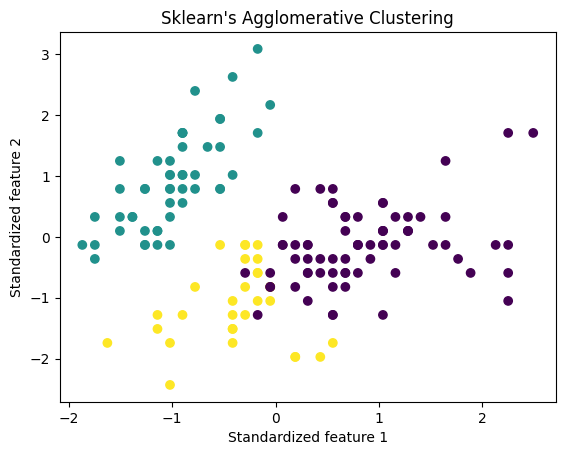

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create an instance of AgglomerativeClustering with 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_std)  # Fit and predict the clusters

# Visualizing the clusters
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg, cmap='viridis')  # Use the cluster labels for coloring
plt.title("Sklearn's Agglomerative Clustering")
plt.xlabel("Standardized feature 1")
plt.ylabel("Standardized feature 2")
plt.show()
